# https://www.learnpytorch.io

In [ ]:
import torch
from torch import nn
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
print(torch.__version__)

# /00_pytorch_fundamentals/

In [ ]:
# Test for Apple Silicon
torch.backends.mps.is_available() # Note this will print false if you're not running on a Mac

In [ ]:
# Set device type
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

In [ ]:
## Tensors
### Creating tensors

In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar
scalar.item()

In [ ]:
# Vector
vector = torch.tensor([7, 7])
vector
vector.ndim
vector.shape

In [ ]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX
MATRIX.ndim
MATRIX.shape

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR
TENSOR.ndim
TENSOR.shape

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

In [ ]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim
#random_image_size_tensor
#random_image_size_tensor, torch.rand

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

In [ ]:
# Use torch.arange(), torch.range() is deprecated
zero_to_ten_deprecated = torch.arange(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

In [ ]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

In [ ]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

In [ ]:
# Create a tensor of all zeros of size (224, 224, 3)
ones = torch.ones(size=(224, 224, 3))
ones, ones.dtype

In [ ]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten


In [ ]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

Stuff got deleted - idk what happend

In [ ]:
tensor = torch.tensor([1, 2, 3])

# Print tensor + 10
print("Add 10 to tensor:", tensor + 10)
print()

# Print tensor * 10
print("Multiply tensor by 10:", tensor * 10)
print()

# Print the original tensor (it hasn't changed yet)
print("Original tensor:", tensor)
print()

# Subtract 10 and reassign to tensor
tensor = tensor - 10
print("Tensor after subtracting 10:", tensor)
print()

# Add 10 and reassign to tensor
tensor = tensor + 10
print("Tensor after adding 10:", tensor)
print()

# Use torch.multiply function to multiply tensor by 10
print("Multiply tensor by 10 using torch.multiply: or torch.mul", torch.mul(tensor, 10))
print()

# Print the original tensor again (it hasn't changed)
print("Original tensor remains unchanged:", tensor)
print()

# Element-wise multiplication (each element multiplies its equivalent, index 0->0, 1->1, 2->2)
print(tensor, "*", tensor)
print("Equals:", tensor * tensor)


## Matrix Multiplication

In [ ]:
tensor = torch.tensor([1, 2, 3])

# Print the shape of the tensor
print("Shape of the tensor:", tensor.shape)
print()

# Element-wise multiplication (multiplying each element by itself)
print("Element-wise matrix multiplication (tensor * tensor):", tensor * tensor)
print()

# Matrix multiplication (using torch.matmul())
print("Matrix multiplication (torch.matmul(tensor, tensor)):", torch.matmul(tensor, tensor))
print()

# Matrix multiplication using the '@' symbol (not recommended)
print("Matrix multiplication using '@' symbol (tensor @ tensor):", tensor @ tensor)
print()

# Manual matrix multiplication by hand using a for loop (inefficient)
print("Manual matrix multiplication by hand (for loop):")
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print("Result:", value)
print()

# Time comparison: manual matrix multiplication
import time
start_time = time.time()
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print("Manual matrix multiplication took:", time.time() - start_time)

# Time comparison: using torch.matmul()
start_time = time.time()
torch.matmul(tensor, tensor)
print("torch.matmul() matrix multiplication took:", time.time() - start_time)


## Initialize vars for mm

In [ ]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                        [3, 4],
                        [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                        [8, 11], 
                        [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B.T) # (this will error) - both are 2,3

In [ ]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                        [3, 4],
                        [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                        [8, 11], 
                        [9, 12]], dtype=torch.float32)

torch.matmul(tensor_A, tensor_B.T) # Fixes error since both inner axis are the same

In [ ]:
print(tensor_A)
print()
print(tensor_B)
print()
print()
print(tensor_A)
print(tensor_B.T)

In [ ]:
# The operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}\n")
print(f"New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n")
print(f"Multiplying: {tensor_A.shape} * {tensor_B.T.shape} <- inner dimensions match\n")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output) 
print(f"\nOutput shape: {output.shape}")

In [ ]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = tensor_A
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x
x.float

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"x datatype before {x.dtype}")
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"x datatype with alteration {x.type(torch.float32).dtype}")
print(f"Sum: {x.sum()}")

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

In [ ]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}") # 1 dimensional

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.) # the #. specifiys a floating point
print(f"{tensor} , {tensor.dtype}")
x = torch.arange(10, 100, 10)
print(f"{x} , {x.dtype}")
print()
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16) # another way to specify dtype=torch.float16 if not a 1d array
print(f"{tensor_float16}")
# Create an int8 tensor
tensor_int8 = tensor.type(torch.int8)
print(f"{tensor_int8}")


In [ ]:
# Create a tensor
x = torch.arange(1., 8.)
print(f"{x, x.shape}")
# Add an extra dimension
x_reshaped = x.reshape(1, 7)
print(f"{x_reshaped, x_reshaped.shape}")

In [ ]:
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
z, z.shape

In [ ]:
# Changing z changes x
z[:, 0] = 5
z, x

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

In [ ]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

print()

print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

In [ ]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

#Indexing (selecting data from tensors)

In [ ]:
# Create a tensor 
x = torch.arange(1, 10).reshape(1, 3, 3)
print(f"{x}, {x.shape}")

print()

# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

In [ ]:
# Get all values of 0th dimension and the 0 index of 1st dimension
print(f"{x[:, 0]}")

# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
print(f"{x[:, :, 1]}")

# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
print(f"{x[:, 1, 1]}")

# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
print(f"{x[0, 0, :]}") # same as x[0][0]

## PyTorch tensors & NumPy

In [ ]:
# NumPy array to tensor
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

In [ ]:
# Change the array, keep the tensor
array = array + 1
array, tensor

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

In [ ]:
# Change the tensor, keep the array the same
tensor = tensor + 1
tensor, numpy_tensor

In [ ]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

In [ ]:
# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
print(RANDOM_SEED)
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

## GPU

In [ ]:
print(torch.cuda.is_available())
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
# Check for Apple Silicon GPU
print(torch.backends.mps.is_available()) # Note this will print false if you're not running on a Mac
# Set device type
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

### Simplified

In [ ]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

print(device)

In [ ]:
# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)
print()

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
print(tensor_on_gpu, tensor_on_gpu.device)

In [ ]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
# tensor_on_gpu.numpy()
print(tensor_on_gpu.device)
print(tensor_on_gpu.to('cpu'), tensor_on_gpu.to('cpu').numpy()) # puts on cpu then to numpy

In [ ]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

In [ ]:
print(tensor_on_gpu)
print(tensor_back_on_cpu)

# /01_pytorch_workflow/

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

## 1. Data (preparing and loading)¶

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds an extra dimension
y = weight * X + bias

X[:10], y[:10]

### Split data into training and test sets

| Split          | Purpose                                                                 | Amount of total data | How often is it used?     |
|----------------|------------------------------------------------------------------------|----------------------|---------------------------|
| Training set   | The model learns from this data (like the course materials you study during the semester). | ~60-80%             | Always                    |
| Validation set | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20%             | Often but not always      |
| Testing set    | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20%             | Always                    |


In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compares predictions.
    """

    plt.figure(figsize=(5, 5))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


In [ ]:
plot_predictions()

## Build model

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                                requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                            requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters()), list(model_0.weights), list(model_0.bias)

In [ ]:
# List named parameters 
model_0.state_dict()

In [ ]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test - y_preds

In [68]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time)) 

In [69]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788740023970604 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020209416747093 | MAE

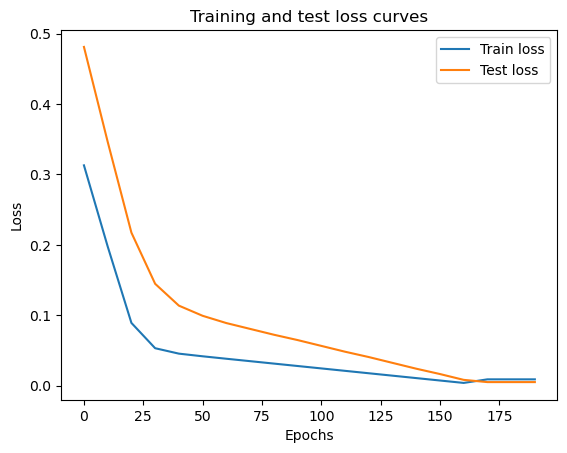

In [70]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [71]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## Making predictions with a trained PyTorch model

In [72]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

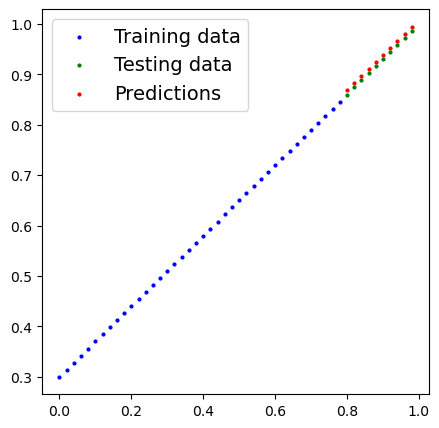

In [73]:
plot_predictions(predictions=y_preds)

In [74]:
# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
            f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [75]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--  1 kathirdev  staff  1680 Dec  9 09:41 models/01_pytorch_workflow_model_0.pth


In [76]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/var/folders/s4/pwrsjxy97wjg_lr8bkqkqmyw0000gp/T/ipykernel_13239/1296048670.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=M

<All keys matched successfully>

In [77]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [78]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## all together

In [79]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [80]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [81]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='mps', index=0)

In [82]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [83]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch: 100 | Train loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904


In [84]:
# Find our model's learned parameters
# pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [85]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

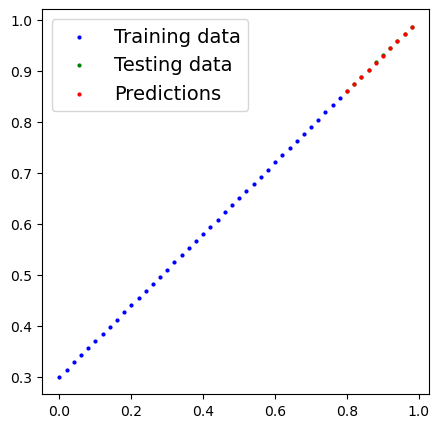

In [86]:
# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())


In [87]:
# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
            f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [88]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
mps:0


/var/folders/s4/pwrsjxy97wjg_lr8bkqkqmyw0000gp/T/ipykernel_13239/2631515358.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MOD

In [89]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')